In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sys.path.append(os.path.join(os.path.dirname(os.getcwd()))) # add parent folder to path
from flow import Paths
Folder, _, _, Subjects = Paths.ExpData(fig_subfolder = 'assoc_shared')
ext = '.pdf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# plotting defaults
sns.set_style("dark");
sns.despine();
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5});
cmap = sns.color_palette("PuBuGn_d")
_figsize = (4,4)
_scale = 0.55


# custom colormap
cmap = sns.color_palette("PuBuGn_d")
c0 = sns.color_palette("husl")
cmap = [c0[0]] + cmap[::-1]
cmap

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.5471741637831603, 0.7045751633986929, 0.8193156478277586),
 (0.38405741381519926, 0.6400871459694989, 0.7639318210944509),
 (0.22534922465718313, 0.5773420479302832, 0.7100448545431245),
 (0.15194668717160065, 0.49502499038831216, 0.6123644752018454),
 (0.16781750608740229, 0.3975855440215301, 0.47617070357554786),
 (0.1841291810841984, 0.297439446366782, 0.3361937716262976)]

<Figure size 432x288 with 0 Axes>

In [3]:
B = pd.read_csv(os.path.join(Folder['csv'],'asx.csv'))
B_ip = B[(B.SeqDist=='hamming') & (B.SeqType=='comb')]
B_ii = B[(B.SeqDist=='bigram') & (B.SeqType=='comb')]

B_ip[(B_ip.K==1)]

Unnamed: 0 SeqType  K  SeqDist      prop  std  num
0           0    comb  1  hamming  0.316406  0.0    0
1           1    comb  1  hamming  0.421875  0.0    1
2           2    comb  1  hamming  0.210938  0.0    2
3           3    comb  1  hamming  0.046875  0.0    3
4           4    comb  1  hamming  0.003906  0.0    4

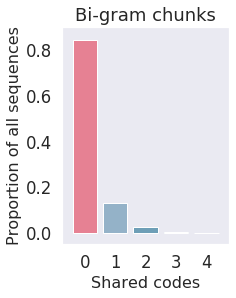

In [167]:
# fg = sns.catplot(data=B_ip[B_ip.SeqType=='comb'], 
#             x='num', y='prop', row='SeqType', col='K', kind='bar', palette='husl')

fig = plt.figure(figsize=(3,4));
ax = sns.barplot(data=B_ii[(B_ii.K==1)], y='prop', x='num', palette=cmap)
ax.set_ylabel('Proportion of all sequences', fontsize=16)
#ax.set_xlabel('Number of shared codes with other sequences', fontsize=16)
ax.set_xlabel('Shared codes', fontsize=16)
ax.set_ylim([-0.05,0.9])
ax.set_xlim([-0.75,4.75])
# ax.set_title('Position-item associations')
ax.set_title('Bi-gram chunks')

plot_name = 'chunk_sim_dist' + ext
fig.savefig(os.path.join(Folder['Fig'], plot_name), bbox_inches = "tight")


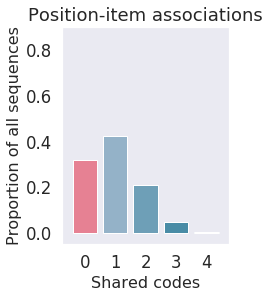

In [168]:
# fg = sns.catplot(data=B_ip[B_ip.SeqType=='comb'], 
#             x='num', y='prop', row='SeqType', col='K', kind='bar', palette='husl')

fig = plt.figure(figsize=(3,4));
ax = sns.barplot(data=B_ip[(B_ip.K==1)], y='prop', x='num', palette=cmap)
ax.set_ylabel('Proportion of all sequences', fontsize=16)
# ax.set_xlabel('Number of shared codes with other sequences', fontsize=16)
ax.set_xlabel('Shared codes', fontsize=16)
ax.set_ylim([-0.05,0.9])
ax.set_xlim([-0.75,4.75])
ax.set_title('Position-item associations')

plot_name = 'ip_sim_dist' + ext
fig.savefig(os.path.join(Folder['Fig'], plot_name), bbox_inches = "tight")


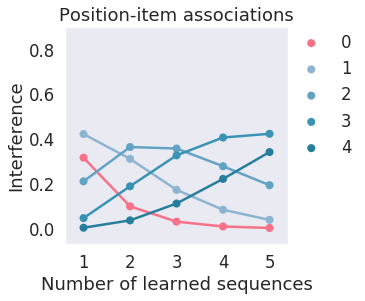

In [174]:
fig = plt.figure(figsize=(4,4));
ax = sns.pointplot(data=B_ip, 
            x='K', y='prop', hue='num', palette=cmap, scale=_scale)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, frameon=False);

ax.set_ylabel('Interference')
ax.set_xlabel('Number of learned sequences')
ax.set_ylim([-0.07,0.9])
ax.set_xlim([-0.4,4.4])
ax.set_title('Position-item associations')

plot_name = 'lines_ip_comb' + ext
fig.savefig(os.path.join(Folder['Fig'], plot_name), bbox_inches = "tight")

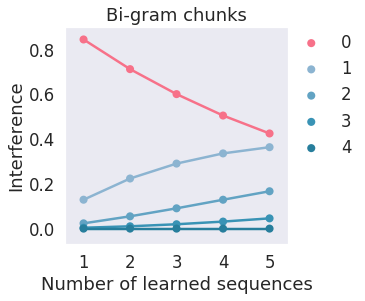

In [175]:
fig = plt.figure(figsize=(4,4));
ax = sns.pointplot(data=B_ii, 
            x='K', y='prop', hue='num', palette=cmap, scale=_scale)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, frameon=False);
ax.set_ylabel('Interference')
ax.set_xlabel('Number of learned sequences')
ax.set_ylim([-0.07,0.9])
ax.set_xlim([-0.4,4.4])
ax.set_title('Bi-gram chunks')

plot_name = 'lines_chunk_comb' + ext
fig.savefig(os.path.join(Folder['Fig'], plot_name), bbox_inches = "tight")